In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline

Load in an image, lets try the agriculture image from: https://apps.sentinel-hub.com/sentinel-playground

In [1]:
file_name = "Sentinel-2 image on 2018-01-12.jpg"

In [5]:
ghana_img = plt.imread("../data/ghana_data/"+file_name)

Our image

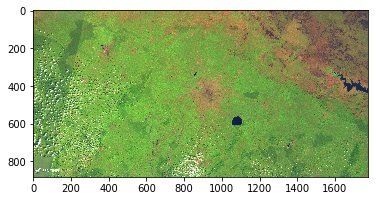

In [39]:
plt.imshow(ghana_img)

In [6]:
ghana_img.shape

(882, 1775, 3)

In [9]:
ghana_img.max()

255

In [10]:
ghana_img.min()

0

Ok, so the image is loaded and the colours range between 255 and 0, we can see the RBG histogram here

In [27]:
np.reshape(ghana_img[:,:,0], -1)

array([148, 117, 118, ...,  96, 104, 112], dtype=uint8)

/home/eddr/.local/share/virtualenvs/bristol_data_dive-ag7wqzNB/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


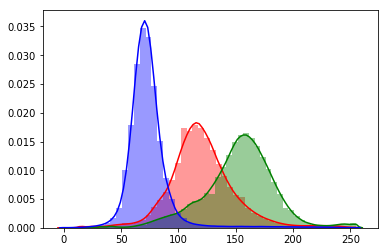

In [96]:
sns.distplot(np.reshape(ghana_img[:,:,0], -1), color = "red", label = "Red")
sns.distplot(np.reshape(ghana_img[:,:,1], -1), color = "green", label = "Green")
sns.distplot(np.reshape(ghana_img[:,:,2], -1), color = "blue", label = "Blue")

So what this tells us is that the green levels are the highest and blue the lowest, so there is a difference between the colour levels we might be able to exploit

/home/eddr/.local/share/virtualenvs/bristol_data_dive-ag7wqzNB/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


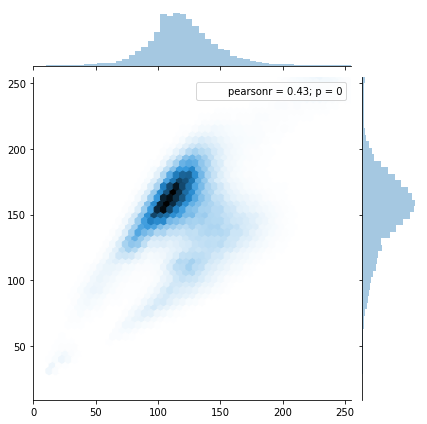

In [35]:
sns.jointplot(np.reshape(ghana_img[:,:,0], -1),
              np.reshape(ghana_img[:,:,1], -1),
             kind = "hex")
plt.show()

/home/eddr/.local/share/virtualenvs/bristol_data_dive-ag7wqzNB/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


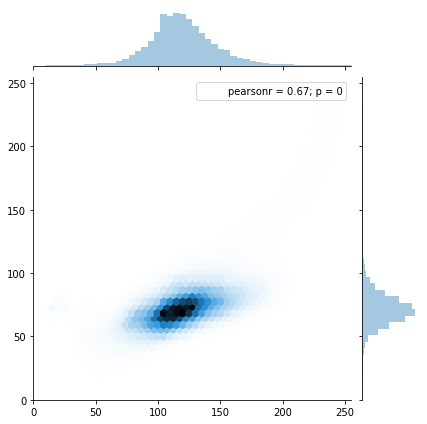

In [37]:
sns.jointplot(np.reshape(ghana_img[:,:,0], -1),
              np.reshape(ghana_img[:,:,2], -1),
             kind = "hex")

plt.show()

/home/eddr/.local/share/virtualenvs/bristol_data_dive-ag7wqzNB/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


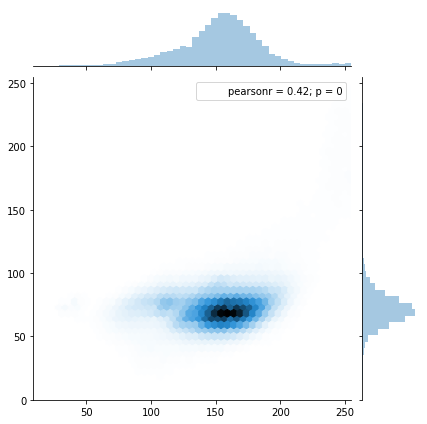

In [38]:
sns.jointplot(np.reshape(ghana_img[:,:,1], -1),
              np.reshape(ghana_img[:,:,2], -1),
             kind = "hex")

plt.show()

In [44]:
ghana_img[:,:,0].size

1565550

Let's cluster

In [78]:
def cluster_image(groups, img):
    
    #put into the right shape
    dims = np.shape(img)
    img_matrix = np.reshape(img, (dims[0] * dims[1], dims[2]))
    
    #cluster
    cl = KMeans(n_clusters = groups)
    img_groups = cl.fit_predict(img_matrix)
    
    #create image
    cluster_img = np.reshape(img_groups, (dims[0], dims[1]))
    
    return img_groups, cluster_img

Lets try a cluster

In [69]:
cl_3 = KMeans(n_clusters = 3)

In [70]:
img_3_groups = cl_3.fit_predict(img_matrix)

In [98]:
img_3_groups, cluster_img = cluster_image(groups = 3, img = ghana_img)

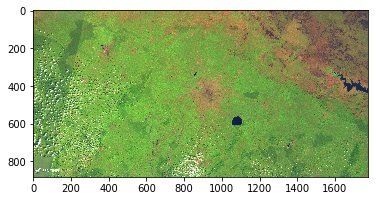

In [56]:
plt.imshow(ghana_img)

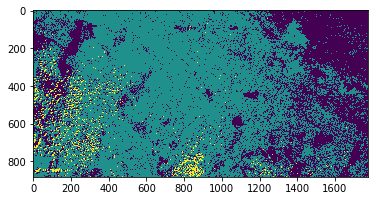

In [72]:
plt.imshow(cluster_3_img)

looks like we have clouds an things that aren't green! Not *that* useful, we can try with more groups

In [60]:
cl_5 = KMeans(n_clusters = 5)

In [62]:
img_5_groups = cl_5.fit_predict(img_matrix)

In [68]:
cluster_5_img = np.reshape(img_5_groups, (dims[0], dims[1]))

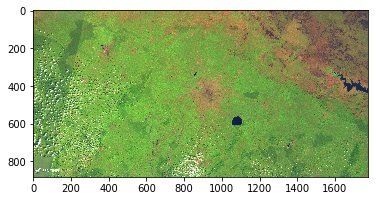

In [63]:
plt.imshow(ghana_img)

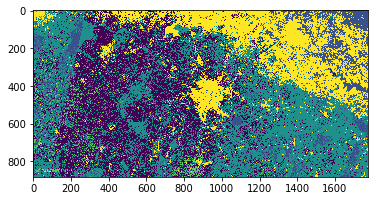

In [67]:
plt.imshow(cluster_5_img)

Here we can clearly see a big city in the middle, that is good! Though it looks like the more mountainous area in the north is cannot be told apart from this, not suprising given the similarities in colour.

Lets try it with more groups to see what happens, but I think we need to add more data!


In [ ]:
#a function to make it easier

In [79]:
img_7_groups, cluster_img = cluster_image(groups = 7, 
                                          img = ghana_img)

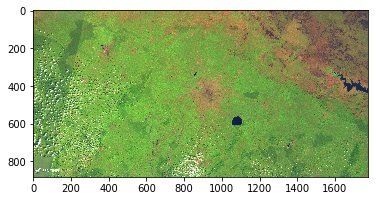

In [80]:
plt.imshow(ghana_img)

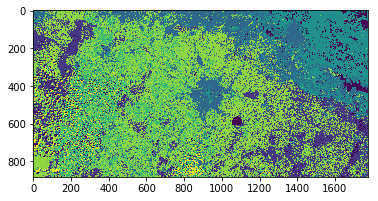

In [81]:
plt.imshow(cluster_img)

In [82]:
veg_file = "Sentinel-2 image on 2018-01-12-vegetation.jpg"

In [84]:
ghana_veg_img = plt.imread("../data/ghana_data/"+veg_file)

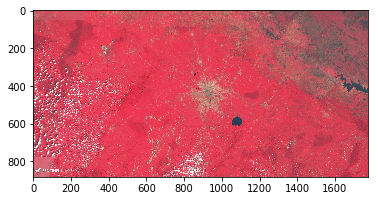

In [85]:
plt.imshow(ghana_veg_img)

In [86]:
veg_3_groups, cluster_img = cluster_image(groups = 3, 
                                          img = ghana_veg_img)

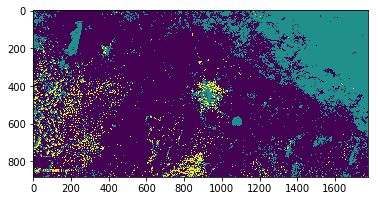

In [87]:
plt.imshow(cluster_img)

In [88]:
veg_3_groups, cluster_img = cluster_image(groups = 5, 
                                          img = ghana_veg_img)

<IPython.core.display.Javascript object>


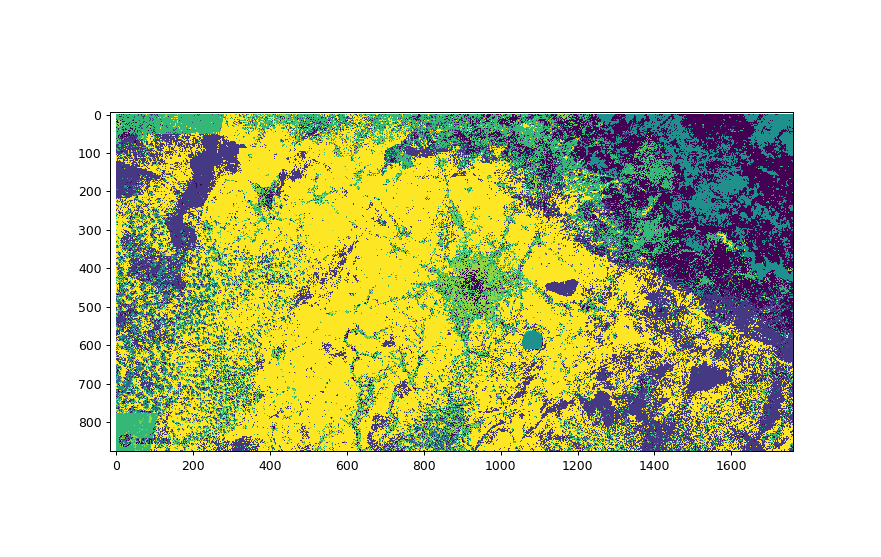

In [92]:
plt.imshow(cluster_img)

In [93]:
veg_7_groups, cluster_img = cluster_image(groups = 7, 
                                          img = ghana_veg_img)

In [94]:
plt.imshow(cluster_img)

In [103]:
nat_file = "Sentinel-2 image on 2018-012-natural.jpg"

In [104]:
ghana_nat_img = plt.imread("../data/ghana_data/"+nat_file)

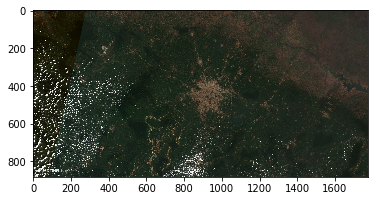

In [105]:
plt.imshow(ghana_nat_img)

In [106]:
img_3_groups, cluster_img = cluster_image(groups = 3, 
                                          img = ghana_nat_img)

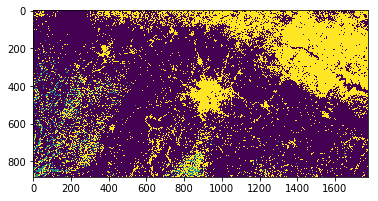

In [108]:
plt.imshow(cluster_img)

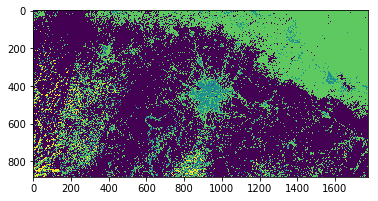

In [110]:
img_3_groups, cluster_img = cluster_image(groups = 5, 
                                          img = ghana_nat_img)

plt.imshow(cluster_img)

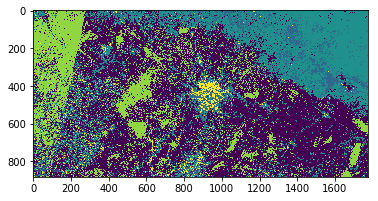

In [111]:
img_3_groups, cluster_img = cluster_image(groups = 7, 
                                          img = ghana_nat_img)

plt.imshow(cluster_img)

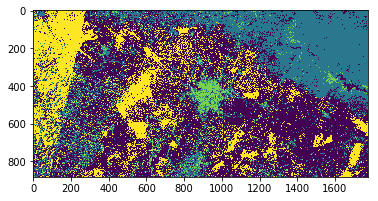

In [112]:
img_3_groups, cluster_img = cluster_image(groups = 6, 
                                          img = ghana_nat_img)

plt.imshow(cluster_img)

In [115]:
file_name = "Sentinel-2 image on 2018-01-12-urban.jpg"
ghana_urban_img = plt.imread("../data/ghana_data/"+file_name)

In [117]:
file_name = "Sentinel-2 image on 2018-01-12-agric.jpg"
ghana_agric_img = plt.imread("../data/ghana_data/"+file_name)

In [119]:
ghana_all_img = np.concatenate([ghana_nat_img, ghana_veg_img,ghana_urban_img, ghana_agric_img], axis = 2)

In [120]:
ghana_all_img.shape

(882, 1775, 12)

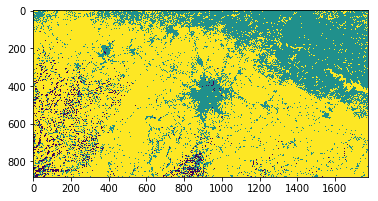

In [121]:
img_3_groups, cluster_img = cluster_image(groups = 3, 
                                          img = ghana_all_img)

plt.imshow(cluster_img)

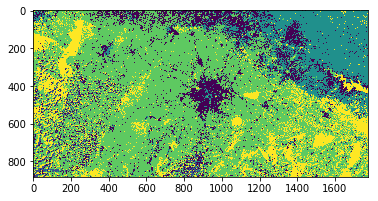

In [122]:
img_3_groups, cluster_img = cluster_image(groups = 5, 
                                          img = ghana_all_img)

plt.imshow(cluster_img)

In [ ]:
img_3_groups, cluster_img = cluster_image(groups = 7, 
                                          img = ghana_all_img)

plt.imshow(cluster_img)